In [273]:
from matplotlib import pyplot as plt #import lib
from numpy import arange
import timeit
from matplotlib.pyplot import figure

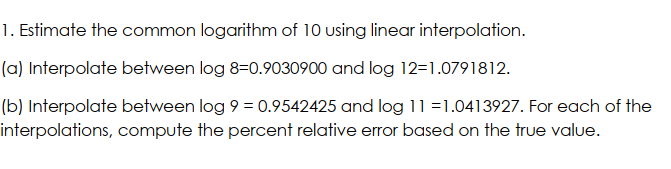

In [274]:
#Exercise 1:
#a)
#define log 8 = 0.9030900 and log 12=1.0791812 
starttime = timeit.default_timer()
xa1 = 8
ya1 = 0.9030900
xa2 = 12
ya2 = 1.0791812
slopea = (ya2 - ya1)/(xa2 - xa1)
intera = ya2 - slopea * xa2
log10a = intera + slopea * 10 #Estimate the common logarithm of 10
print("a) Estimated value of log 10 is: ", round(log10a,6))
print("Relative error is: ", round(abs(log10a - 1)*100,3), '%') #compute the percent relative error 
print("The runtime of exercise 1a is : ", round(timeit.default_timer() - starttime,4), 'second.')
#b)
#define log 9 = 0.9542425 and log 11 =1.0413927
starttime = timeit.default_timer()
xb1 = 9
yb1 = 0.9542425
xb2 = 11
yb2 = 1.0413927
slopeb = (yb2 - yb1)/(xb2 - xb1)
interb = yb2 - slopeb * xb2
log10b = interb + slopeb * 10 #Estimate the common logarithm of 10
print("b) Estimated value of log 10 is: ", round(log10b,6))
print("Relative error is: ", round(abs(log10b - 1)*100,3), '%') #compute the percent relative error 
print("The runtime of exercise 1b is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex1")

a) Estimated value of log 10 is:  0.991136
Relative error is:  0.886 %
The runtime of exercise 1a is :  0.0055 second.
b) Estimated value of log 10 is:  0.997818
Relative error is:  0.218 %
The runtime of exercise 1b is :  0.0013 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex1


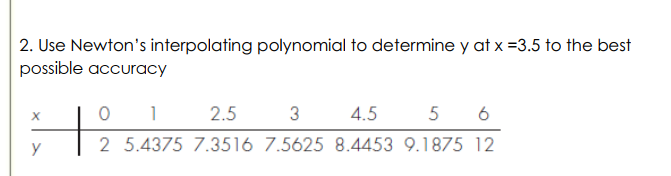

In [275]:
#Exercise 2: Newton's interpolating
class DataPoint: #Create datapoint to input
        def __init__ (self, x, y): #define init in the datapoint
            self .x = x
            self .y = y

In [276]:
def diff(data): #define discrete difference along the given data
    if len(data) == 1:
        return data[0].y
    elif len(data) == 2:
        numerator = data[1].y - data[0].y
        denominator = data[1].x - data[0].x
        return numerator/denominator
    else:
        numerator = diff(data[1:]) - diff(data[:-1])
        denominator = data[-1].x - data[0].x
        return numerator/denominator    

In [277]:
def newton_interpolation_coefficients(data): #define newton interpolation coefficients
    coefficient = []
    for i in range(1, len(data) + 1):
        coefficient.append(diff(data[:i]))
    return coefficient

In [278]:
def newton_interpolation_value(data, target): #define newton interpolation value
    coefficients = newton_interpolation_coefficients(data)
    result = 0
    for i in range(len(data)):
        product = 1
        for j in range(i):
            product *= target-data[j].x
        result += coefficients[i]*product
    return result

In [279]:
def newton_interpolation_error(data,target): #define newton interpolation error
    product = 1
    for i in range(len(data)- 1):
        product *= target - data[i].x
    return abs(diff(data)*product)

In [280]:
def newton_interpolation_graph(best_data, data, data_graph_x, data_graph_y, value_graph_x, value_graph_y): #define newton interpolation graph
    x_min = data[0].x
    x_max = data[-1].x
    for k in range(len(data)):
        if data[k].x > x_max:
            x_max = data[k].x
        if data[k].x < x_min:
            x_min = data[k].x
        for k in range(x_min, x_max , 1):
            value_graph_x.append(k) #put the counter in array
            value_graph_y.append(newton_interpolation_value(best_data, k))
        for k in range(len(data)):
            data_graph_x.append(data[k].x)
            data_graph_y.append(data[k].y)

In [281]:
def newton_interpolation_value_by_degree(data, target, order, data_graph_x, data_graph_y, value_graph_x, value_graph_y): #define newton interpolation value by degree
    final_data = data
    error = "N/A (Highest order)"
    if order<len(data)- 1:
        start = 0
        end = order +2
        best_data = data[:end]
        while start + end <= len(data):
            tmp_data = data[start:start+end]
            if newton_interpolation_error(tmp_data, target) < newton_interpolation_error(best_data, target):
                best_data = tmp_data
            start += 1
        error = str(newton_interpolation_error(best_data, target).__round__(6))
        final_data = best_data[:-1]
    newton_interpolation_graph(final_data, data, data_graph_x, data_graph_y,value_graph_x, value_graph_y)
    return newton_interpolation_value(final_data, target), error

In [282]:
data_input = [   #Input data
              DataPoint (0, 2),
              DataPoint (1 , 5.4375),
              DataPoint (2.5 , 7.3516),
              DataPoint (3 , 7.5625),
              DataPoint (4.5 , 8.4453),
              DataPoint (5 , 9.1875),
              DataPoint (6 , 12),
]

Plot the result of order 0 to 6 in graph

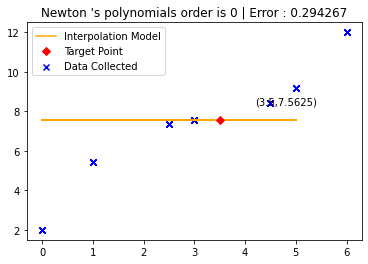

The runtime of exercise 2_Case 1 is :  0.3082 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 1


In [283]:
starttime = timeit.default_timer()
#Plot the result of order 0 in graph
graph_values_y = []
graph_values_x = []
data_values_y = []
data_values_x = []
chosen_order = 0 #Choose the order
chosen_target = 3.5
res = newton_interpolation_value_by_degree(data_input,chosen_target,chosen_order,data_values_x,data_values_y,graph_values_x,graph_values_y)
plt.title("Newton 's polynomials order is " + str(chosen_order) + " | Error : " + res[1])
plt.scatter(data_values_x, data_values_y, marker = "x", c = "blue", label = "Data Collected") #label is the named of legend
plt.plot(graph_values_x, graph_values_y, c="orange", label ="Interpolation Model")
plt.plot(chosen_target, res[0], "D", c="red", label ="Target Point")
plt.annotate('('+ str(chosen_target) + ',' + str(res[0].__round__(6)) + ')', xy = (chosen_target + 0.7, res[0] * 1.1))
plt.legend()
plt.savefig('Order' + str(chosen_order) + '.png')
plt.show()
print("The runtime of exercise 2_Case 1 is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 1")

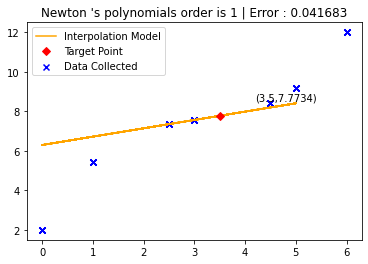

The runtime of exercise 2_Case 2 is :  0.5566 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 2


In [284]:
starttime = timeit.default_timer()
#Plot the result of order 1 in graph
graph_values_y = []
graph_values_x = []
data_values_y = []
data_values_x = []
chosen_order = 1 #Choose the order
chosen_target = 3.5
res = newton_interpolation_value_by_degree(data_input,chosen_target,chosen_order,data_values_x,data_values_y,graph_values_x,graph_values_y)
plt.title("Newton 's polynomials order is " + str(chosen_order) + " | Error : " + res[1])
plt.scatter(data_values_x, data_values_y, marker = "x", c = "blue", label = "Data Collected") #label is the named of legend
plt.plot(graph_values_x, graph_values_y, c="orange", label ="Interpolation Model")
plt.plot(chosen_target, res[0], "D", c="red", label ="Target Point")
plt.annotate('('+ str(chosen_target) + ',' + str(res[0].__round__(6)) + ')', xy = (chosen_target + 0.7, res[0] * 1.1))
plt.legend()
plt.savefig('Order' + str(chosen_order) + '.png')
plt.show()
print("The runtime of exercise 2_Case 2 is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 2")

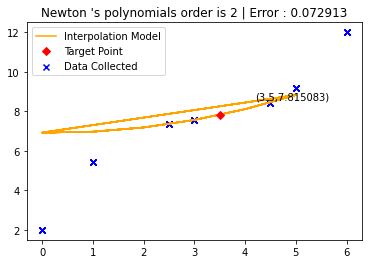

The runtime of exercise 2_Case 3 is :  0.3085 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 3


In [285]:
starttime = timeit.default_timer()
#Plot the result of order 2 in graph
graph_values_y = []
graph_values_x = []
data_values_y = []
data_values_x = []
chosen_order = 2 #Choose the order
chosen_target = 3.5
res = newton_interpolation_value_by_degree(data_input,chosen_target,chosen_order,data_values_x,data_values_y,graph_values_x,graph_values_y)
plt.title("Newton 's polynomials order is " + str(chosen_order) + " | Error : " + res[1])
plt.scatter(data_values_x, data_values_y, marker = "x", c = "blue", label = "Data Collected") #label is the named of legend
plt.plot(graph_values_x, graph_values_y, c="orange", label ="Interpolation Model")
plt.plot(chosen_target, res[0], "D", c="red", label ="Target Point")
plt.annotate('('+ str(chosen_target) + ',' + str(res[0].__round__(6)) + ')', xy = (chosen_target + 0.7, res[0] * 1.1))
plt.legend()
plt.savefig('Order' + str(chosen_order) + '.png')
plt.show()
print("The runtime of exercise 2_Case 3 is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 3")

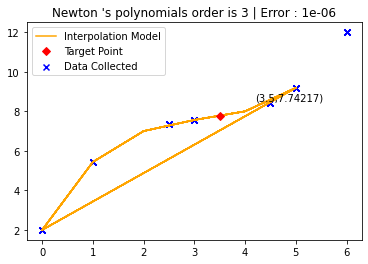

The runtime of exercise 2_Case 4 is :  0.3185 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 4


In [286]:
starttime = timeit.default_timer()
#Plot the result of order 3 in graph
graph_values_y = []
graph_values_x = []
data_values_y = []
data_values_x = []
chosen_order = 3 #Choose the order
chosen_target = 3.5
res = newton_interpolation_value_by_degree(data_input,chosen_target,chosen_order,data_values_x,data_values_y,graph_values_x,graph_values_y)
plt.title("Newton 's polynomials order is " + str(chosen_order) + " | Error : " + res[1])
plt.scatter(data_values_x, data_values_y, marker = "x", c = "blue", label = "Data Collected") #label is the named of legend
plt.plot(graph_values_x, graph_values_y, c="orange", label ="Interpolation Model")
plt.plot(chosen_target, res[0], "D", c="red", label ="Target Point")
plt.annotate('('+ str(chosen_target) + ',' + str(res[0].__round__(6)) + ')', xy = (chosen_target + 0.7, res[0] * 1.1))
plt.legend()
plt.savefig('Order' + str(chosen_order) + '.png')
plt.show()
print("The runtime of exercise 2_Case 4 is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 4")

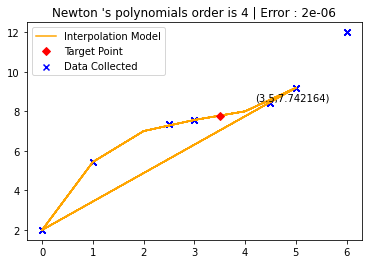

The runtime of exercise 2_Case 5 is :  0.3052 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 5


In [287]:
starttime = timeit.default_timer()
#Plot the result of order 4 in graph
graph_values_y = []
graph_values_x = []
data_values_y = []
data_values_x = []
chosen_order = 4 #Choose the order
chosen_target = 3.5
res = newton_interpolation_value_by_degree(data_input,chosen_target,chosen_order,data_values_x,data_values_y,graph_values_x,graph_values_y)
plt.title("Newton 's polynomials order is " + str(chosen_order) + " | Error : " + res[1])
plt.scatter(data_values_x, data_values_y, marker = "x", c = "blue", label = "Data Collected") #label is the named of legend
plt.plot(graph_values_x, graph_values_y, c="orange", label ="Interpolation Model")
plt.plot(chosen_target, res[0], "D", c="red", label ="Target Point")
plt.annotate('('+ str(chosen_target) + ',' + str(res[0].__round__(6)) + ')', xy = (chosen_target + 0.7, res[0] * 1.1))
plt.legend()
plt.savefig('Order' + str(chosen_order) + '.png')
plt.show()
print("The runtime of exercise 2_Case 5 is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 5")

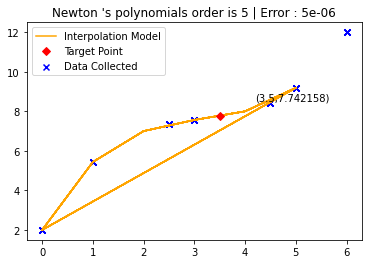

The runtime of exercise 2_Case 6 is :  0.2924 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 6


In [288]:
starttime = timeit.default_timer()
#Plot the result of order 5 in graph
graph_values_y = []
graph_values_x = []
data_values_y = []
data_values_x = []
chosen_order = 5 #Choose the order
chosen_target = 3.5
res = newton_interpolation_value_by_degree(data_input,chosen_target,chosen_order,data_values_x,data_values_y,graph_values_x,graph_values_y)
plt.title("Newton 's polynomials order is " + str(chosen_order) + " | Error : " + res[1])
plt.scatter(data_values_x, data_values_y, marker = "x", c = "blue", label = "Data Collected") #label is the named of legend
plt.plot(graph_values_x, graph_values_y, c="orange", label ="Interpolation Model")
plt.plot(chosen_target, res[0], "D", c="red", label ="Target Point")
plt.annotate('('+ str(chosen_target) + ',' + str(res[0].__round__(6)) + ')', xy = (chosen_target + 0.7, res[0] * 1.1))
plt.legend()
plt.savefig('Order' + str(chosen_order) + '.png')
plt.show()
print("The runtime of exercise 2_Case 6 is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 6")

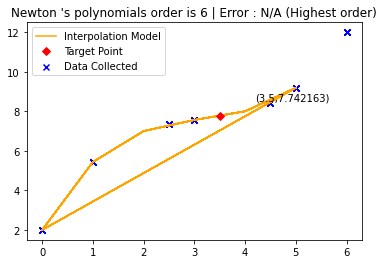

The runtime of exercise 2_Case 7 is :  0.2974 second.
Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 7


In [289]:
starttime = timeit.default_timer()
#Plot the result of order 6 in graph
graph_values_y = []
graph_values_x = []
data_values_y = []
data_values_x = []
chosen_order = 6 #Choose the order
chosen_target = 3.5
res = newton_interpolation_value_by_degree(data_input,chosen_target,chosen_order,data_values_x,data_values_y,graph_values_x,graph_values_y)
plt.title("Newton 's polynomials order is " + str(chosen_order) + " | Error : " + res[1])
plt.scatter(data_values_x, data_values_y, marker = "x", c = "blue", label = "Data Collected") #label is the named of legend
plt.plot(graph_values_x, graph_values_y, c="orange", label ="Interpolation Model")
plt.plot(chosen_target, res[0], "D", c="red", label ="Target Point")
plt.annotate('('+ str(chosen_target) + ',' + str(res[0].__round__(6)) + ')', xy = (chosen_target + 0.7, res[0] * 1.1))
plt.legend()
plt.savefig('Order' + str(chosen_order) + '.png')
plt.show()
print("The runtime of exercise 2_Case 7 is : ", round(timeit.default_timer() - starttime,4), 'second.')
print("Lê Thanh Phương Nam_ITITWE19025_Lab6TMC_ex2_Case 7")

Comment: At orders 0 and 1, the Interpolation Model is still a straight line. However, it starts to tilt, separate, and gradually curves in the direction of the y axis